# Estudio de la Cinemática y Dinámica de un Robot SCARA con Tres Grados de Libertad

## Resumen 

Este trabajo analiza la configuración de un robot SCARA compuesto por tres eslabones, uno de los cuales está fijado al sistema inercial, y tres juntas rotacionales. Con el fin de determinar la relación entre la posición, la orientación y el desplazamiento de cada articulación, se desarrollará el modelo cinemático de la pose, las velocidades y la aceleración, desde el origen hasta el punto encargado de ejecutar las tareas que se asignan al robot. Posteriormente, se planteará el modelo dinámico de esta configuración utilizando el enfoque de Euler-Lagrange, tanto en su forma directa como inversa. Este análisis busca comprender cómo las juntas y la interacción que tienen entre los eslabones influyen en el comportamiento del sistema. El desarrollo integrara los modelos cinemáticos y dinámicos, directos e inversos.

## Introducción

Con el objetivo de aumentar la producción, la precisión y la eficiencia de los procesos, se ha impulsado la creación de sistemas manipuladores programables y automatizables, conocidos como robots.[1] Estas máquinas fueron implementadas inicialmente en la industria, y con el tiempo han sido adoptadas en otros campos de aplicación, en los cuales ya cuentan con cierta capacidad para razonar y tomar decisiones a fin de cumplir sus objetivos.

En el aspecto industrial, los robots destacan por su capacidad para ejecutar ciclos prolongados de tareas sin comprometer su precisión. En la actualidad la producción industrial exige cada vez mayor flexibilidad en los procesos de fabricación, lo que demanda sistemas robóticos capaces de adaptarse tanto a condiciones actuales como futuras [1].

Un ejemplo de las soluciones robóticas industriales actuales, es el robot SCARA (Selective Compliant Assembly Robot Arm), de arquitectura en serie, es ampliamente utilizado en operaciones de ensamblaje y tareas de “pick and place”. Este tipo de robot suele incorporar dos juntas rotacionales para el posicionamiento rápido en el plano horizontal, y una junta lineal para el desplazamiento en el eje vertical [2], [3]. Por lo general, el movimiento del robot SCARA debe ser de alta velocidad y precisión. Por lo tanto, el análisis de la cinemática del robot debe ser cuidadoso, preciso y eficiente [3].

Debido a que el modelo DH (Denavit-Hertenberg) da bastante información con respecto de la posición del elemento y es fácil extraer las variables de interés, se realizó el modelo cinemático con el método DH, y se utilizó la simulación Matlab para verificar el modelo.

Entre los aspectos críticos en el diseño de robots se encuentran el tiempo de ciclo y la capacidad de carga útil. Esta última se refiere a la cantidad de masa que puede soportar el punto donde se realiza el trabajo, y está influenciada por el peso de cada eslabón, así como por el de la herramienta utilizada para ejecutar la tarea asignada. Este factor es fundamental, ya que involucra directamente el comportamiento dinámico del robot. Asimismo, debe considerarse el tiempo requerido para completar un ciclo completo de la tarea programada. Ejemplo de ellos es el IRB 930 SCARA de alta carga útil con una capacidad de 12 kg o 22 kg y con una mejora en el tiempo de ciclo de hasta en un 10%.[1]

A diferencia de los robots SCARA comerciales, nuestro modelo está compuesto por tres eslabones y tres juntas rotacionales. Como consecuencia, el movimiento se limita principalmente al plano horizontal, por ende, se necesita desarrollar el modelo cinemático y dinámico del sistema. Permitiendo comprender su comportamiento y requerimientos necesarios para garantizar un funcionamiento óptimo.

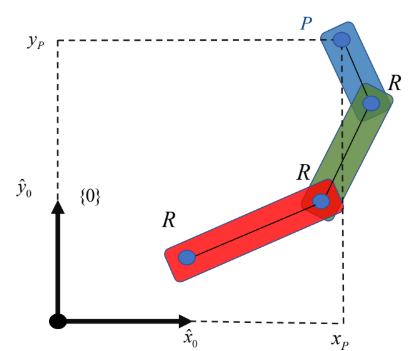

## Modelado cinemático de la postura

Comenzamos por el desarrollo del modelo cinemático de la postura, para lo cual se define inicialmente el sistema de referencia inercial. Posteriormente, se establecen los sistemas de coordenadas asociados a cada una de las juntas rotacionales, provocando las restricciones de movimiento del robot.

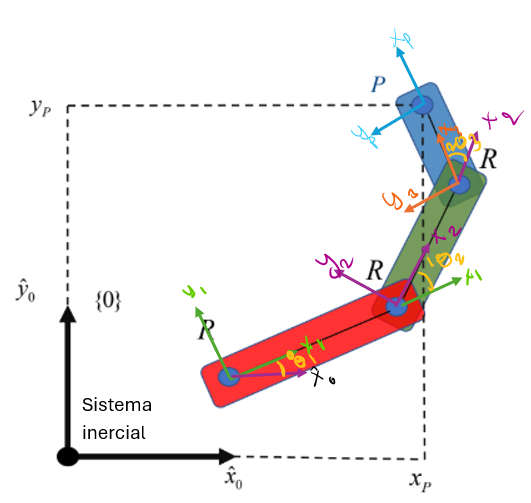

Como estamos considerando este movimiento en el plano, la posición en el eje Z no nos importa de momento. Nuestro referente ahora es el eje x, el cual nos mostrara la rotación que experimenta cada eslabón alrededor del eje z. El eje x se orientado de manera paralela a la longitud del eslabón, para poder describir su cambio de orientación.

Como se mencionó antes se ocupó el modelo Denavit-Hertenberg por lo cual se aplica el siguiente modelo.


(\begin{array}{cccc} \cos\left(\mathrm{ai}_{j}\right)\,\cos\left(\mathrm{bi}_{j}\right) & \cos\left(\mathrm{ai}_{j}\right)\,\sin\left(\mathrm{bi}_{j}\right)\,\sin\left(\mathrm{gi}_{j}\right)-\cos\left(\mathrm{gi}_{j}\right)\,\sin\left(\mathrm{ai}_{j}\right) & \sin\left(\mathrm{ai}_{j}\right)\,\sin\left(\mathrm{gi}_{j}\right)+\cos\left(\mathrm{ai}_{j}\right)\,\cos\left(\mathrm{gi}_{j}\right)\,\sin\left(\mathrm{bi}_{j}\right) & x_{i,j}\\ \cos\left(\mathrm{bi}_{j}\right)\,\sin\left(\mathrm{ai}_{j}\right) & \cos\left(\mathrm{ai}_{j}\right)\,\cos\left(\mathrm{gi}_{j}\right)+\sin\left(\mathrm{ai}_{j}\right)\,\sin\left(\mathrm{bi}_{j}\right)\,\sin\left(\mathrm{gi}_{j}\right) & \cos\left(\mathrm{gi}_{j}\right)\,\sin\left(\mathrm{ai}_{j}\right)\,\sin\left(\mathrm{bi}_{j}\right)-\cos\left(\mathrm{ai}_{j}\right)\,\sin\left(\mathrm{gi}_{j}\right) & y_{i,j}\\ -\sin\left(\mathrm{bi}_{j}\right) & \cos\left(\mathrm{bi}_{j}\right)\,\sin\left(\mathrm{gi}_{j}\right) & \cos\left(\mathrm{bi}_{j}\right)\,\cos\left(\mathrm{gi}_{j}\right) & z_{i,j}\\ 0 & 0 & 0 & 1 \end{array}\)

Esta matriz contine la matriz de orientación, el vector de posición y la escala del punto que se analiza.

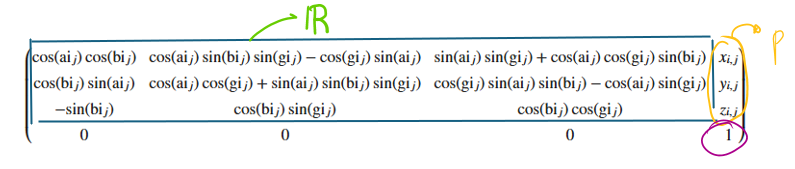

Del sistema inercial al sistema uno se tiene una rotación  theta _O_1, por ende la matriz tendrá solo valores en los componentes de XY, XX,  YX, YY y Z ya que el ángulo afecta directamente al eje X y Y, y no hay un cambio en el eje Z. Por ende nuestra transformación queda como:

(\begin{array}{cccc} \cos\left(\theta _{O,1}\right) & -\sin\left(\theta _{O,1}\right) & 0 & x_{O,1}\\ \sin\left(\theta _{O,1}\right) & \cos\left(\theta _{O,1}\right) & 0 & y_{O,1}\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1 \end{array}\)

La matriz de rotación para el sistema de referencias dos y tres será igual que el sistema de referencia a uno, solo cambia el ángulo que afecta a la orientación. La posición solo depende de la longitud del eslabón por la orientación del eje x. Por ende las transformadas quedan como:


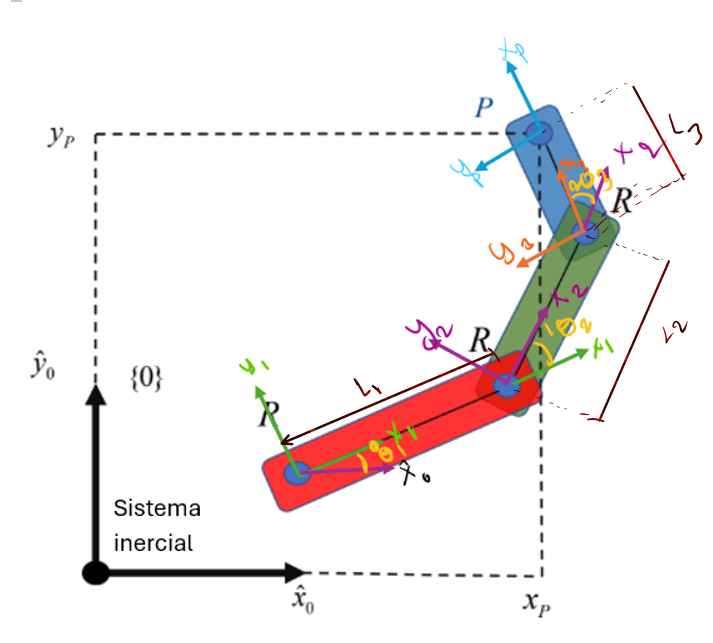

(\begin{array}{cccc} \cos\left(\theta _{1,2}\right) & -\sin\left(\theta _{1,2}\right) & 0 & L_{1}\\ \sin\left(\theta _{1,2}\right) & \cos\left(\theta _{1,2}\right) & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1 \end{array}\)

(\begin{array}{cccc} \cos\left(\theta _{2,3}\right) & -\sin\left(\theta _{2,3}\right) & 0 & L_{2}\\ \sin\left(\theta _{2,3}\right) & \cos\left(\theta _{2,3}\right) & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1 \end{array}\)

Para el punto P, no hay un cambio de orientación, solo hay un cambio de posición 

(\begin{array}{cccc} 1 & 0 & 0 & L_{3}\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1 \end{array}\)

Para obtener la trasformada de 0 a P se multiplican las trasformadas 

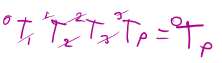

(\begin{array}{cccc} \cos\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right) & -\sin\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right) & 0 & x_{O,1}+L_{2}\,\cos\left(\theta _{1,2}+\theta _{O,1}\right)+L_{1}\,\cos\left(\theta _{O,1}\right)+L_{3}\,\cos\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right)\\ \sin\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right) & \cos\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right) & 0 & y_{O,1}+L_{2}\,\sin\left(\theta _{1,2}+\theta _{O,1}\right)+L_{1}\,\sin\left(\theta _{O,1}\right)+L_{3}\,\sin\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right)\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1 \end{array}\)

## Modelado cinemático de las velocidades

## Modelado cinemático de las aceleraciones

## Conclusión

## Referencias 

[1]	G. B. Muniyandi, “Citation: Muniyandi GB (2024) In-Depth Analysis of Kinematic, Dynamic, and Control Aspects of a 4-Axis SCARA Robot Manipulator,” Int J Robot Eng, vol. 7, p. 37, 2024, doi: 10.35840/2631-5106/4137.

[2]	C. Feng, G. Gao, and Y. Cao, “Kinematic modeling and verification for a SCARA robot,” 2016.

[3]	B. Fernini, “Dynamic Behavior of a SCARA Robot by using N-E Method for a Straight Line and Simulation of Motion by using Solidworks and Verification by Matlab/Simulink,” International Journal of Robotics and Automation (IJRA), vol. 3, no. 4, pp. 221–233, 2014.
